In [1]:
import pandas as pd
import requests
import io
import bqplot
import ipywidgets
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

In [2]:
data = pd.read_csv("police-arrests-upload_20181105.csv", low_memory = False)

In [3]:
data.head()

,arrest_code,incident_number,date_of_arrest,year_of_arrest,month_of_arrest,arrest_type_description,crime_code,crime_code_description,crime_category_code,crime_category_description,...,arrestee_sex,arrestee_race,arrestee_employment_description,arrestee_residency_description,arrestee_home_city,arrestee_home_state,arrestee_home_zip,arrest_resolution,count,arrestee_home_city_mapped
0,A00-00003,T00-00003,01/04/2000,2000,1,SUMMONED,2461,OPERATE UNINSURED MOTOR VEHICLE,C28,Traffic Offenses,...,MALE,BLACK,UNKNOWN,RESIDENT,CHAMPAIGN,IL,61820,BONDED OUT,1,"CHAMPAIGN,IL,61820"
1,A00-00004,T00-00004,01/04/2000,2000,1,SUMMONED,6601,SPEEDING (RADAR),C28,Traffic Offenses,...,FEMALE,WHITE,EMPLOYED,NON-RESIDENT,POTOMAC,IL,61865,BONDED OUT,1,"POTOMAC,IL,61865"
2,A00-00006,T00-00006,01/04/2000,2000,1,SUMMONED,6601,SPEEDING (RADAR),C28,Traffic Offenses,...,FEMALE,WHITE,UNKNOWN,RESIDENT,NaN,NaN,00000,BONDED OUT,1,",,00000"
3,A00-00007,T00-00007,01/04/2000,2000,1,SUMMONED,6601,SPEEDING (RADAR),C28,Traffic Offenses,...,FEMALE,WHITE,UNKNOWN,NON-RESIDENT,CHAMPAIGN,IL,61820,BONDED OUT,1,"CHAMPAIGN,IL,61820"
4,A00-00008,T00-00008,01/04/2000,2000,1,SUMMONED,2461,OPERATE UNINSURED MOTOR VEHICLE,C28,Traffic Offenses,...,MALE,WHITE,UNKNOWN,NON-RESIDENT,CHAMPAIGN,IL,61820,BONDED OUT,1,"CHAMPAIGN,IL,61820"


In [4]:
data.shape

(200671, 26)

In [5]:
data.columns

Index(['arrest_code', 'incident_number', 'date_of_arrest', 'year_of_arrest',
       'month_of_arrest', 'arrest_type_description', 'crime_code',
       'crime_code_description', 'crime_category_code',
       'crime_category_description', 'conspiracy_code', 'statute', 'violation',
       'disposition_code', 'disposition_description', 'age_at_arrest',
       'arrestee_sex', 'arrestee_race', 'arrestee_employment_description',
       'arrestee_residency_description', 'arrestee_home_city',
       'arrestee_home_state', 'arrestee_home_zip', 'arrest_resolution',
       'count', 'arrestee_home_city_mapped'],
      dtype='object')

<BarContainer object of 12 artists>

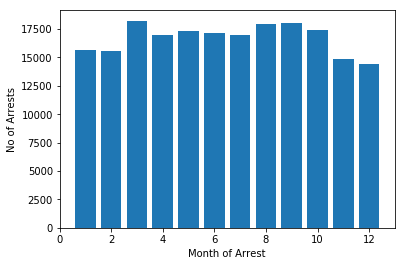

In [6]:
month_list = data.month_of_arrest
# count arrest count in different years
month_count_map = {}
for month in month_list:
    month_count_map[month] = month_count_map.get(month, 0) + 1

month_list = []
count_list = []
for month, count in month_count_map.items():
    month_list.append(month)
    count_list.append(count)
    

plt.xlabel('Month of Arrest')
plt.ylabel('No of Arrests')
plt.bar(month_list, count_list)

# PART 2

# Top 10 crimes comitted

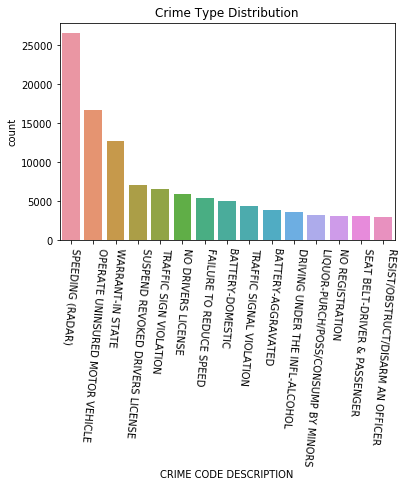

In [7]:
sns.countplot(x='crime_code_description', data = data, order= data['crime_code_description'].value_counts().iloc[:15].index).set_title('Crime Type Distribution');
 
plt.xlabel("CRIME CODE DESCRIPTION") 
plt.xticks(rotation=-95)
plt.show()

## Distribution by Arrestee city


In [8]:
data.groupby("arrestee_home_city")["year_of_arrest"].describe()

,count,mean,std,min,25%,50%,75%,max
arrestee_home_city,,,,,,,,
11/90 URBANA,1.0,1990.000000,NaN,1990.0,1990.00,1990.0,1990.00,1990.0
CHAMPAIGN,1.0,1991.000000,NaN,1991.0,1991.00,1991.0,1991.00,1991.0
OAK PARK,1.0,1989.000000,NaN,1989.0,1989.00,1989.0,1989.00,1989.0
URBANA,6.0,2009.833333,4.355074,2005.0,2006.25,2009.5,2013.50,2015.0
#102 CHAMPAIGN,2.0,2008.000000,0.000000,2008.0,2008.00,2008.0,2008.00,2008.0
#11 URBANA 6-89,1.0,1989.000000,NaN,1989.0,1989.00,1989.0,1989.00,1989.0
"#1133, URBANA",1.0,1998.000000,NaN,1998.0,1998.00,1998.0,1998.00,1998.0
"#2016,TEMPE",1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
#203 URBANA,1.0,2013.000000,NaN,2013.0,2013.00,2013.0,2013.00,2013.0


In [9]:
#data cleaning

clean_data =data.dropna(subset=['arrestee_home_city'])

In [10]:
employment_disc = data.arrestee_employment_description.fillna("UNKNOWN")

In [11]:
clean_data["arrestee_home_city"].count()

177168

In [12]:
clean_data["arrestee_home_city"].isna().sum()

0

In [13]:
clean_data.loc[clean_data["arrestee_home_city"].str.contains('CHAMAP')] = 'CHAMPAIGN'
clean_data.loc[clean_data['arrestee_home_city'].str.contains('HMPAIGN'),'arrestee_home_city'] = 'CHAMPAIGN'
clean_data.loc[clean_data['arrestee_home_city'].str.contains('HAMPA'),'arrestee_home_city'] = 'CHAMPAIGN'
clean_data.loc[clean_data['arrestee_home_city'].str.contains('RBANA'),'arrestee_home_city'] = 'URBANA'
clean_data.loc[clean_data['arrestee_home_city'].str.contains('URANA'),'arrestee_home_city'] = 'URBANA'
clean_data.loc[clean_data['arrestee_home_city'].str.contains('URABAN'),'arrestee_home_city'] = 'URBANA'
clean_data.loc[clean_data['arrestee_home_city'].str.contains('URABNA'),'arrestee_home_city'] = 'URBANA'
clean_data.loc[clean_data['arrestee_home_city'].str.contains('URBAAN'),'arrestee_home_city'] = 'URBANA'
clean_data.loc[clean_data['arrestee_home_city'].str.contains('URBAN'),'arrestee_home_city'] = 'URBANA'

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

In [14]:
clean_data["arrestee_home_city"].describe()

count     177168
unique      2471
top       URBANA
freq       88860
Name: arrestee_home_city, dtype: object

In [15]:
clean_data.groupby("arrestee_home_city")["year_of_arrest"].describe()

,count,unique,top,freq
arrestee_home_city,,,,
OAK PARK,1,1,1989,1
"#2016,TEMPE",1,1,2007,1
#6 CARBONDALE,1,1,2005,1
#8 BISMARK,1,1,2004,1
.,30,15,1997,6
01-90,2,2,1990,1
03/90 MILWAUKEE,2,2,1990,1
1/90 RANTOUL,2,1,1990,2
10/90 CHICAGO,1,1,1990,1


# Age of Person at the time of arrest

Text(0.5, 1.0, 'Arrests by Age')

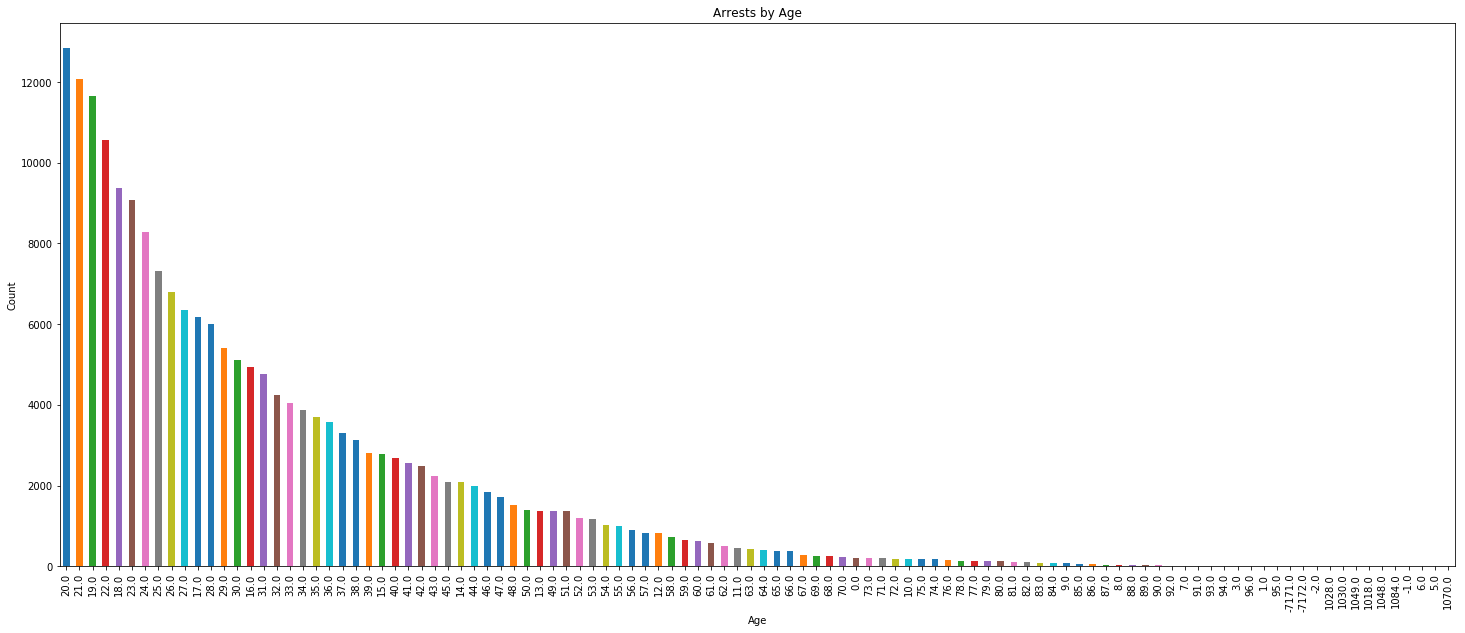

In [16]:
plt.figure(figsize = (25,10))
data["age_at_arrest"].value_counts().plot.bar()

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Arrests by Age')

In [17]:
data_under_18 = []

data_under_18 = data.copy()
condition = data_under_18["age_at_arrest"] >= 18
rows = data_under_18.loc[condition,:]
data_under_18.drop(rows.index, inplace = True)   #19164 records

#data_under_18

In [18]:
data_age_errors = []
data_age_errors = data_under_18.copy()

condition = data_age_errors["age_at_arrest"] > 0
rows = data_age_errors.loc[condition,:]
data_age_errors.drop(rows.index, inplace = True)  #207 records
#data_age_errors

In [19]:
data_minors = []

data_minors = data_under_18.copy()

condition = data_minors['age_at_arrest'] <= 0
rows = data_minors.loc[(condition), :]
data_minors.drop(rows.index, inplace=True)   #18957 records

#data_minors

In [20]:
data_non_minors = []
data_non_minors = data.copy()

cond = data_non_minors['age_at_arrest'] < 18
rows = data_non_minors.loc[cond, :]
data_non_minors.drop(rows.index, inplace=True)                # 181507 records

#data_non_minors

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



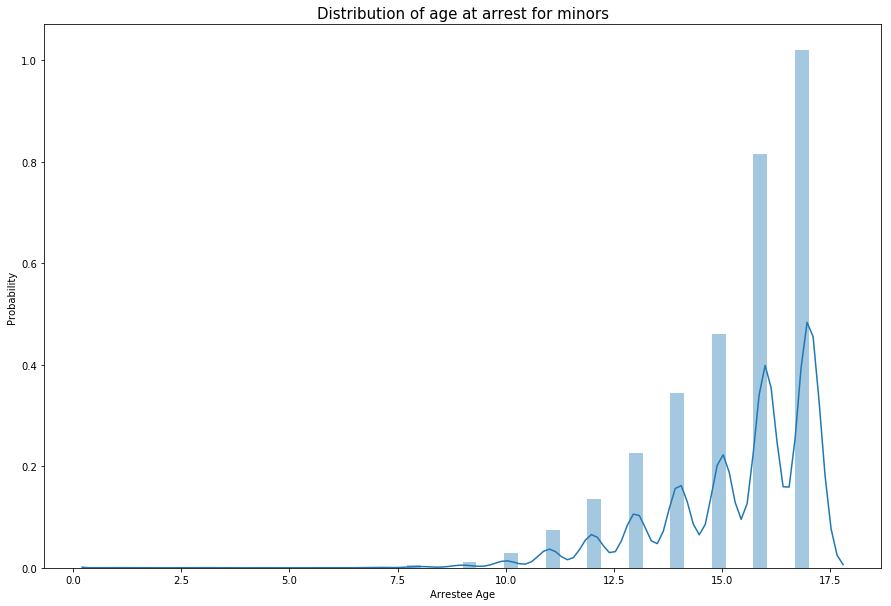

In [21]:

plt.figure(figsize = (15,10))
# histogram
sns.distplot(data_minors['age_at_arrest'])
plt.ylabel('Probability', size = 10)
plt.xlabel('Arrestee Age', size = 10)
plt.title('Distribution of age at arrest for minors', size = 15);

# Distribution By Race

#### Firstly we wanted to look at the breakdown of crimes comitted by males and females individually. Later we broke down it to total crimes comitted by different races and after that we visualized it according to the races and gender both.

In [22]:
def get_x_y_for_plotting(pandas_series):
    count_map = {}
    for colum_data in pandas_series:
        count_map[colum_data] = count_map.get(colum_data, 0) + 1

    colum_data_list = []
    count_list = []
    for colum_data, count in count_map.items():
        colum_data_list.append(colum_data)
        count_list.append(count)
    return colum_data_list, count_list

Text(0, 0.5, 'Arrested Counts')

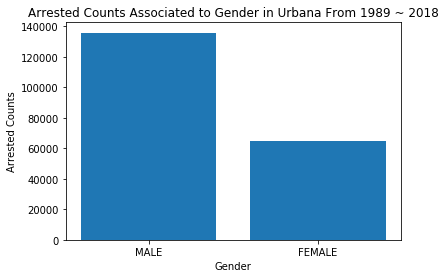

In [23]:
x, y = get_x_y_for_plotting(data[data.arrestee_sex.isin(['MALE', 'FEMALE'])].arrestee_sex)
plt.bar(x, y)
plt.title("Arrested Counts Associated to Gender in Urbana From 1989 ~ 2018")
plt.xlabel('Gender')
plt.ylabel("Arrested Counts")

In [24]:
data["arrestee_race"].unique()

array(['BLACK', 'WHITE', 'AMERICAN INDIAN/ALASKAN', 'HISPANIC', 'ASIAN',
       'UNKNOWN', '.', 'BUSINESS OR OTHER'], dtype=object)

In [25]:
#cleaning arrestee race column

clean_race_data = data[(data['arrestee_race'] != '.') & (data['arrestee_race'] != 'BUSINESS OR OTHER')]
clean_race_df = clean_race_data.groupby('arrestee_race').count()
#clean_race_df

In [26]:
#sort race by highest to lowest
sorted_race = clean_race_df['count'].sort_values()
sorted_race

arrestee_race
UNKNOWN                       179
AMERICAN INDIAN/ALASKAN       230
HISPANIC                     7097
ASIAN                        9287
BLACK                       83264
WHITE                      100417
Name: count, dtype: int64

Text(0.5, 1.0, 'Racial breakdown of arrestees')

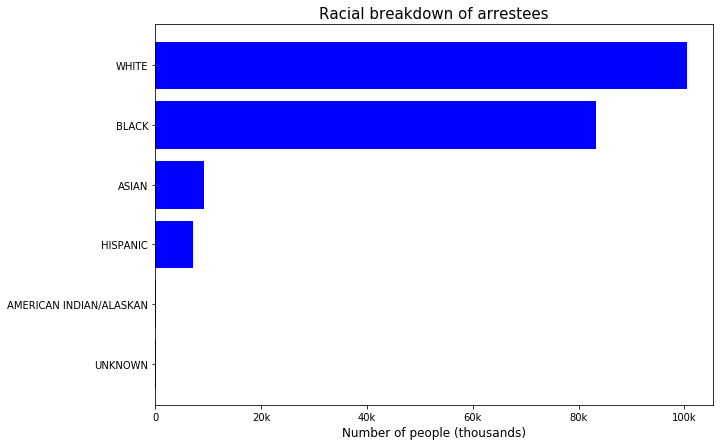

In [27]:
plt.figure(figsize = (10,7))
plt.barh(range(len(sorted_race.index)), sorted_race.values, color='blue')
plt.yticks(range(len(sorted_race.index)), sorted_race.index)
plt.xlabel('Number of people (thousands)', size = 12)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20k', '40k', '60k','80k', '100k'])
plt.title('Racial breakdown of arrestees', size = 15)

In [28]:
def count_race_gender(race, gender):
    return len(data[(data.arrestee_race == race)&(data.arrestee_sex == gender)])

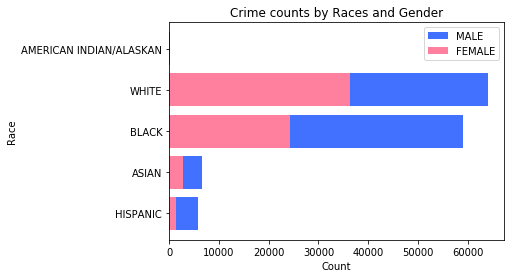

In [29]:
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

races = list(set(data[~data.arrestee_race.isin(['.', 'UNKNOWN', 'BUSINESS OR OTHER'])].arrestee_race))

hash_map = {}
for race in races:
    hash_map[race] = {}
    hash_map[race]["MALE"] = count_race_gender(race, "MALE")
    hash_map[race]["FEMALE"] = count_race_gender(race, "FEMALE")

male_count = [hash_map[race]['MALE'] for race in hash_map]
female_count = [hash_map[race]['FEMALE'] for race in hash_map]

p1 = ax.barh(races, male_count, color=(0.2588,0.4433,1.0))
p2 = ax.barh(races, female_count, color=(1.0,0.5,0.62))
ax.set_ylabel('Race')
ax.set_xlabel('Count')
ax.set_title('Crime counts by Races and Gender')


plt.legend(["MALE", "FEMALE"])


In [30]:
all_race = [race for race in sorted_race.index]
all_race.append('ALL')
all_race_rev = list(reversed(all_race))

In [31]:

@ipywidgets.interact(selector = all_race_rev)
def make_plot(selector):
    if selector == 'ALL': 
        for race in all_race:
            if race != 'ALL':
                plt.plot(data[data['arrestee_race'] == race].groupby('year_of_arrest')['count'].count(), marker = '.', label=race)
            plt.legend(prop={'size': 5})
           
    else: 
        plt.plot(data[data['arrestee_race'] == selector].groupby('year_of_arrest')['count'].count(), marker = '.', color='red', label=selector)
    plt.ylabel('Count of People')
    plt.yticks([0, 1000, 2000, 3000, 4000])
    plt.xlabel('Year')
    plt.title('Arrestee Race over years')

interactive(children=(Dropdown(description='selector', options=('ALL', 'WHITE', 'BLACK', 'ASIAN', 'HISPANIC', …

# Distribution by Employment


In [32]:

employment_count = {}
for employment in employment_disc:
    employment_count[employment] = employment_count.get(employment, 0) + 1

employment_disc = []
count_list = []
for employment, count in employment_count.items():
    employment_disc.append(employment)
    count_list.append(count)

Text(0, 0.5, 'Employment Status')

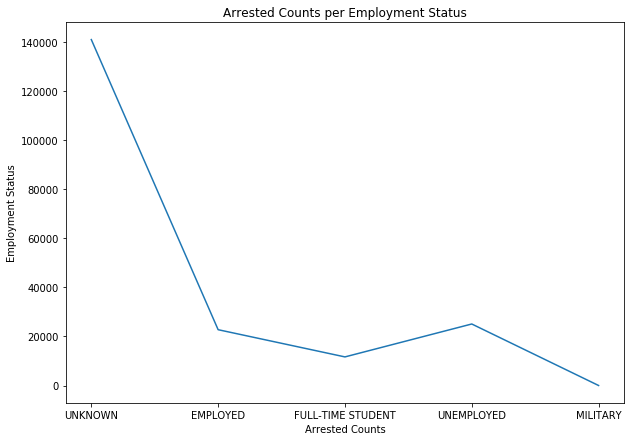

In [33]:
plt.figure(figsize = (10,7))
plt.plot(employment_disc, count_list)
plt.title("Arrested Counts per Employment Status")
plt.xlabel('Arrested Counts')
plt.ylabel("Employment Status")

## Trying to plot map by distribution of arrestee states

In [34]:
data.head()

,arrest_code,incident_number,date_of_arrest,year_of_arrest,month_of_arrest,arrest_type_description,crime_code,crime_code_description,crime_category_code,crime_category_description,...,arrestee_sex,arrestee_race,arrestee_employment_description,arrestee_residency_description,arrestee_home_city,arrestee_home_state,arrestee_home_zip,arrest_resolution,count,arrestee_home_city_mapped
0,A00-00003,T00-00003,01/04/2000,2000,1,SUMMONED,2461,OPERATE UNINSURED MOTOR VEHICLE,C28,Traffic Offenses,...,MALE,BLACK,UNKNOWN,RESIDENT,CHAMPAIGN,IL,61820,BONDED OUT,1,"CHAMPAIGN,IL,61820"
1,A00-00004,T00-00004,01/04/2000,2000,1,SUMMONED,6601,SPEEDING (RADAR),C28,Traffic Offenses,...,FEMALE,WHITE,EMPLOYED,NON-RESIDENT,POTOMAC,IL,61865,BONDED OUT,1,"POTOMAC,IL,61865"
2,A00-00006,T00-00006,01/04/2000,2000,1,SUMMONED,6601,SPEEDING (RADAR),C28,Traffic Offenses,...,FEMALE,WHITE,UNKNOWN,RESIDENT,NaN,NaN,00000,BONDED OUT,1,",,00000"
3,A00-00007,T00-00007,01/04/2000,2000,1,SUMMONED,6601,SPEEDING (RADAR),C28,Traffic Offenses,...,FEMALE,WHITE,UNKNOWN,NON-RESIDENT,CHAMPAIGN,IL,61820,BONDED OUT,1,"CHAMPAIGN,IL,61820"
4,A00-00008,T00-00008,01/04/2000,2000,1,SUMMONED,2461,OPERATE UNINSURED MOTOR VEHICLE,C28,Traffic Offenses,...,MALE,WHITE,UNKNOWN,NON-RESIDENT,CHAMPAIGN,IL,61820,BONDED OUT,1,"CHAMPAIGN,IL,61820"


In [35]:
for col in data.columns:
    data[col] = data[col].astype(str)

In [36]:
data[col]

0           CHAMPAIGN,IL,61820
1             POTOMAC,IL,61865
2                      ,,00000
3           CHAMPAIGN,IL,61820
4           CHAMPAIGN,IL,61820
5              URBANA,IL,61801
6               HOMER,IL,61849
7          THOMASBORO,IL,61878
8           CHAMPAIGN,IL,61820
9           CHAMPAIGN,IL,61820
10             URBANA,IL,00000
11             URBANA,IL,61801
12             SKOKIE,IL,60077
13        NORTH HAVEN,CT,06473
14             URBANA,IL,61801
15         CARBONDALE,IL,62901
16             URBANA,IL,61801
17           DANVILLE,IL,61832
18          CHAMPAIGN,IL,61820
19          CHAMPAIGN,IL,61820
20          CHAMPAIGN,IL,61820
21          CHAMPAIGN,IL,61820
22          CHAMPAIGN,IL,61820
23             NEWMAN,IL,61942
24             NEWMAN,IL,61942
25          CHAMPAIGN,IL,61820
26          CHAMPAIGN,IL,61820
27         THOMASBORO,IL,61878
28          CHAMPAIGN,IL,61820
29             `RBANA,IL,61801
                  ...         
200641      CHAMPAIGN,IL,61821
200642  

In [37]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

In [38]:
int_age_data = data["age_at_arrest"].apply(lambda x: int(x[:-2]))
cleaned_age = data[int_age_data > 0]["age_at_arrest"].apply(lambda x: int(x[:-2]))

In [39]:
from collections import OrderedDict

age_count_map = {}
for age in cleaned_age:
    if age not in age_count_map:
        age_count_map[age] = 1
    else:
        age_count_map[age] += 1

In [40]:
ordered_dict = OrderedDict(sorted(age_count_map.items(), key = lambda x: x[0]))
age_list = []
count_list = []
for age, count in ordered_dict.items():
    if age < 150:
        age_list.append(age)
        count_list.append(count)

In [41]:
def on_selection_change(change):
    min_val, max_val = change['new']
    selected = (cleaned_age < max_val) & (cleaned_age > min_val)
    total_counts = 0
    for age, count in ordered_dict.items():
        if min_val < age and age < max_val:
            total_counts += count
    label.value = "Total Counts: %s" % total_counts

In [42]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label = 'Age')
y_ax = bqplot.Axis(scale = y_sc, label = 'Count', orientation = 'vertical')

scatters = bqplot.Scatter(x = age_list,
                          y = count_list,
                          scales = {'x': x_sc, 'y': y_sc})

selector = bqplot.interacts.FastIntervalSelector(
            scale = x_sc, marks = [scatters])

In [43]:
import bqplot

In [44]:
selector = bqplot.interacts.FastIntervalSelector(
            scale = x_sc, marks = [scatters])
fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax], interaction = selector)
display(fig)

Figure(axes=[Axis(label='Age', scale=LinearScale(), side='bottom'), Axis(label='Count', orientation='vertical'…

In [45]:
selector.observe(on_selection_change, ['selected'])
label = ipywidgets.Label("Total counts for range of Age: ")
display(label)

Label(value='Total counts for range of Age: ')

In [48]:
cleaned_age.value_counts().sum()

200464